In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
%matplotlib inline

In [2]:
#removing values where gene-id is 0 (unidentified)
data = pd.read_csv('ExpressionR50.csv', header =None)
rows = pd.read_csv('RowsR50.csv')
age = np.array([12, 13, 13, 12, 16, 17, 21, 21, 24, 35, 37])
gene_id = rows.ix[:,2]
data_id = pd.concat([data, gene_id], axis=1)
new_data = data_id[data_id['gene-id']!= 0]
clean_data = new_data.ix[:,:-1]
new_data.head()

,0,1,2,3,4,5,6,7,8,9,10,gene-id
0,2.1039,3.4865,2.3438,2.6535,1.9149,3.4019,3.9780,3.2876,3.9467,3.3072,3.4198,30786
2,6.1532,7.1778,6.5365,6.8227,6.4406,7.5052,7.2353,7.3459,7.4539,7.3443,7.4484,865
3,2.3737,2.8386,2.1724,2.6676,2.2044,2.8495,2.9133,2.9174,2.8335,2.8269,2.8689,34129
4,0.8133,2.5186,1.8037,1.7742,0.8331,2.3178,2.9540,2.5963,2.9586,3.1302,3.4110,81016
5,2.3806,2.6172,2.2394,2.3388,1.8360,3.1963,3.5848,3.4812,3.3278,3.0575,3.1573,34829


In [3]:
#running DBSCAN
db = DBSCAN(eps=0.2, min_samples=6).fit(clean_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1


/Users/sandyliang/anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


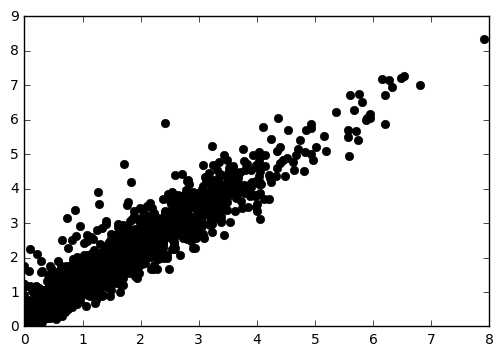

In [4]:
#plotting whole dataset
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = clean_data[class_member_mask & core_samples_mask].values
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = clean_data[class_member_mask & ~core_samples_mask].values
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
plt.show()

In [5]:
sixteen = clean_data.ix[:,4]

In [6]:
#DBSCAN on 16 PCW age group only
X = sixteen.reshape(-1, 1)
db = DBSCAN(eps=0.03, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
np.unique(labels)

Estimated number of clusters: 7


array([-1,  0,  1,  2,  3,  4,  5,  6])

/Users/sandyliang/anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


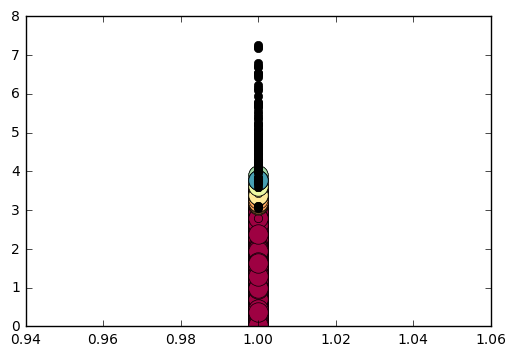

In [7]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ones = np.ones(xy.shape)
    plt.plot(ones, xy, 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask]
    ones = np.ones(xy.shape)
    plt.plot(ones, xy, 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.show()

In [8]:
sixteen_id = new_data.ix[:, [4,'gene-id']]

In [9]:
labelsDF = pd.DataFrame(labels)

In [10]:
sixteen_labels = pd.concat([sixteen_id, labelsDF], axis=1, ignore_index=True)

In [11]:
sixteen_id2 = sixteen_id.reset_index()
sixteen_id2 = sixteen_id2.ix[:,1:3]

In [12]:
sixteen_labels = pd.concat([sixteen_id2, labelsDF], axis=1)

In [13]:
sixteen_labels

,4,gene-id,0
0,1.9149,30786,0
1,6.4406,865,-1
2,2.2044,34129,0
3,0.8331,81016,0
4,1.8360,34829,0
5,3.4906,34913,1
6,0.9552,1021095,0
7,0.0087,171002,0
8,0.0217,80267,0
9,0.0000,7591,0


In [14]:
cluster0 = data_id[data_id['gene-id']!= 0]